Dataset Shape: (768, 9)

Missing values:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Summary statistics:
        Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000

/tmp/ipython-input-3725239181.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome', data=df, palette='Set2')


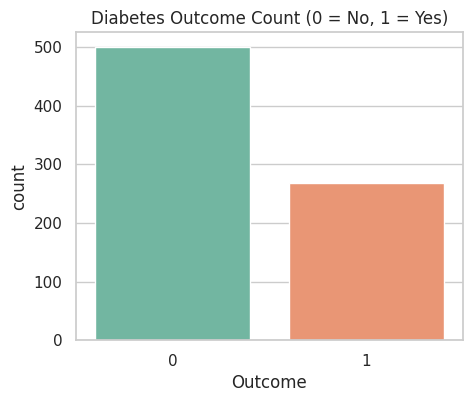

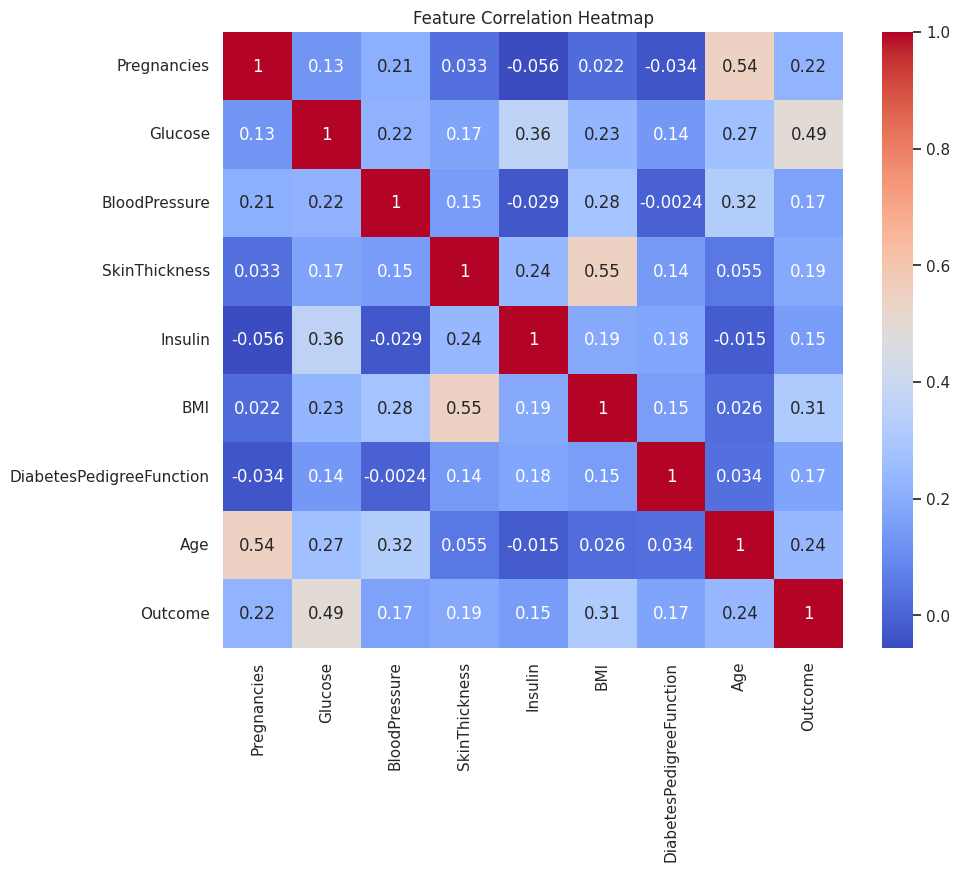

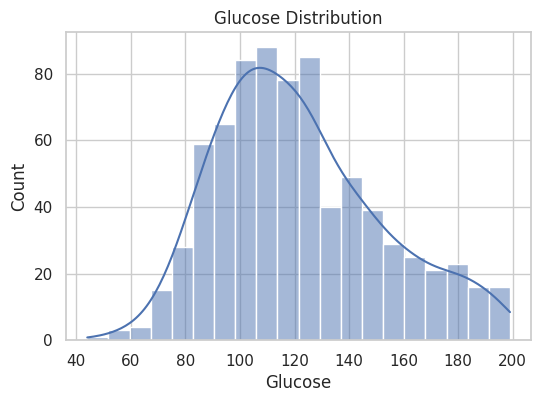

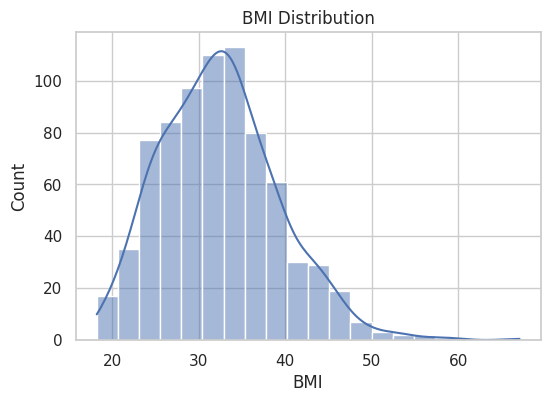

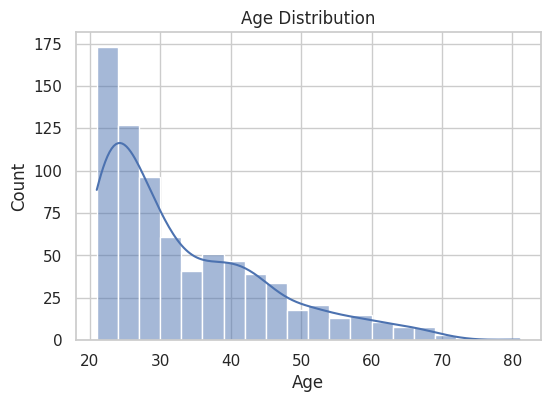

Model Accuracy: 76.62%

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.81      0.82        99
           1       0.67      0.69      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



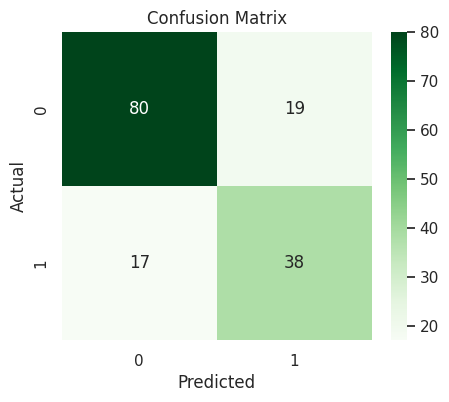

/tmp/ipython-input-3725239181.py:119: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance, y=feature_importance.index, palette='viridis')


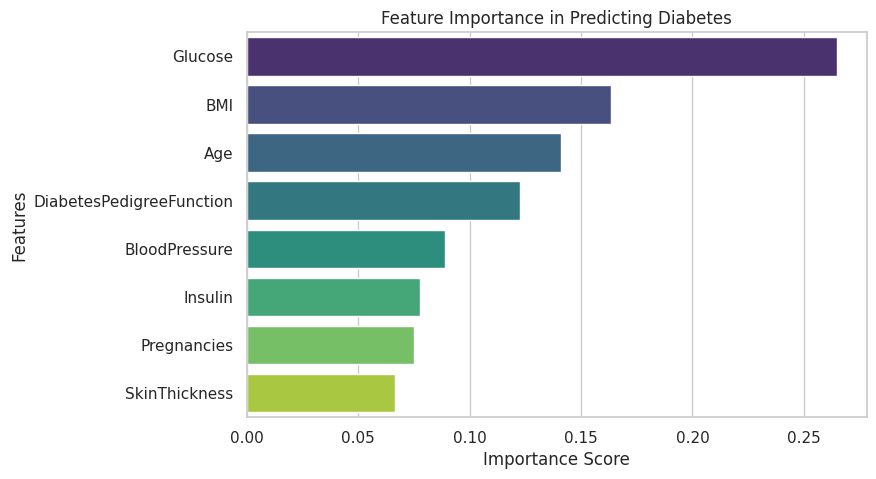


Top Features Influencing Prediction:
 Glucose                     0.264943
BMI                         0.163291
Age                         0.141010
DiabetesPedigreeFunction    0.122428
BloodPressure               0.089150
Insulin                     0.077839
Pregnancies                 0.074988
SkinThickness               0.066351
dtype: float64
Project Summary:
----------------------------------------
1. SDG Focus: SDG 3 – Good Health and Well-being
2. Problem: Predict diabetes risk to support early detection.
3. Algorithm: Random Forest Classifier
4. Model Accuracy: 76.62%
5. Key Drivers: Glucose, BMI, Age, and Insulin levels.

Ethical Note:
This model should assist in early awareness, not replace professional diagnosis.


In [1]:
# ===============================
# Step 1: Import Libraries
# ===============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

# Make plots look better
sns.set(style="whitegrid")

# ===============================
# Step 2: Load Dataset
# ===============================
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"

# Column names from dataset description
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
           'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

df = pd.read_csv(url, names=columns)

# Preview the dataset
df.head()

# ===============================
# Step 3: Basic Exploration
# ===============================
print("Dataset Shape:", df.shape)
print("\nMissing values:\n", df.isnull().sum())
print("\nSummary statistics:\n", df.describe())

# Class balance
plt.figure(figsize=(5,4))
sns.countplot(x='Outcome', data=df, palette='Set2')
plt.title('Diabetes Outcome Count (0 = No, 1 = Yes)')
plt.show()

# ===============================
# Step 4: Data Cleaning
# ===============================
# In this dataset, zeros represent missing data in some columns
cols_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Replace zeros with the median of each column
for col in cols_with_zeros:
    df[col] = df[col].replace(0, df[col].median())

# Check again
df.describe()

# ===============================
# Step 5: Data Visualization
# ===============================
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

# Visualize distribution of key features
features = ['Glucose', 'BMI', 'Age']
for f in features:
    plt.figure(figsize=(6,4))
    sns.histplot(df[f], bins=20, kde=True)
    plt.title(f'{f} Distribution')
    plt.show()

# ===============================
# Step 6: Split and Scale Data
# ===============================
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ===============================
# Step 7: Train Random Forest Model
# ===============================
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)

# ===============================
# Step 8: Evaluate Model
# ===============================
acc = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {acc*100:.2f}%")

print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ===============================
# Step 9: Feature Importance
# ===============================
feature_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=feature_importance, y=feature_importance.index, palette='viridis')
plt.title("Feature Importance in Predicting Diabetes")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

print("\nTop Features Influencing Prediction:\n", feature_importance)

# ===============================
# Step 10: Conclusion
# ===============================
print("Project Summary:")
print("-" * 40)
print("1. SDG Focus: SDG 3 – Good Health and Well-being")
print("2. Problem: Predict diabetes risk to support early detection.")
print("3. Algorithm: Random Forest Classifier")
print(f"4. Model Accuracy: {acc*100:.2f}%")
print("5. Key Drivers: Glucose, BMI, Age, and Insulin levels.")
print("\nEthical Note:")
print("This model should assist in early awareness, not replace professional diagnosis.")
